# Emotion Classifier (Testing)

In [18]:
import sys

import cv2
from keras.models import load_model
import numpy as np

from keras.preprocessing import image

## Implementation

We are looking to:

<ol type="0">
    <li>Load Image (JPG)</li>
    <li>Load Saved Model</li>
</ol>    

In [49]:
def load_detection_model(model_path):
    detection_model = cv2.CascadeClassifier(model_path)
    return detection_model

def detect_faces(detection_model, gray_image_array):
    return detection_model.detectMultiScale(gray_image_array, 1.3, 5)

def draw_bounding_box(face_coordinates, image_array, color):
    x, y, w, h = face_coordinates
    cv2.rectangle(image_array, (x, y), (x + w, y + h), color, 2)

def apply_offsets(face_coordinates, offsets):
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

def draw_text(coordinates, image_array, text, color, x_offset=0, y_offset=0,
                                                font_scale=2, thickness=2):
    x, y = coordinates[:2]
    cv2.putText(image_array, text, (x + x_offset, y + y_offset),
                cv2.FONT_HERSHEY_SIMPLEX,
                font_scale, color, thickness, cv2.LINE_AA)

emotion_labels = {0:'angry',1:'disgust',2:'fear',3:'happy',
                4:'sad',5:'surprise',6:'neutral'}
# parameters for loading data and images
image_path = 'harry-meghan-15.jpg'
output_img = 'predicted2.png'
detection_model_path = 'haarcascade_frontalface_default.xml'
emotion_model_path = 'emotion.h5'

font = cv2.FONT_HERSHEY_SIMPLEX

# hyper-parameters for bounding boxes shape
emotion_offsets = (20, 40)
emotion_offsets = (0, 0)

# loading models
face_detection = load_detection_model(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)

# getting input model shapes for inference
emotion_target_size = emotion_classifier.input_shape[1:3]


### Loading Image

We are looking to load the image for prediction

In [50]:
# loading images
rgb_image = image.load_img(image_path, grayscale=False, target_size=None)
gray_image = image.load_img(image_path, grayscale=True, target_size=None)
gray_image = np.squeeze(gray_image)
gray_image = gray_image.astype('uint8')

faces = detect_faces(face_detection, gray_image)
print("Found " + str(len(faces)) + " faces")

Found 2 faces


### Start Prediction

Starting prediction for the image.

In [51]:
for face_coordinates in faces:
    x1, x2, y1, y2 = apply_offsets(face_coordinates, emotion_offsets)
    rgb_image_np = np.array(rgb_image)
    rgb_face = rgb_image_np[y1:y2, x1:x2]
    gray_face = gray_image[y1:y2, x1:x2]

    try:
        gray_face = cv2.resize(gray_face, (emotion_target_size))
    except:
        print("Error resizing")
        continue

    
    rgb_face = np.expand_dims(rgb_face, 0)

    #gray_face = preprocess_input(gray_face)
    gray_face = np.expand_dims(gray_face, 0)
    gray_face = np.expand_dims(gray_face, -1)
    emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
    emotion_text = emotion_labels[emotion_label_arg]

    color = (255, 0, 0)

    draw_bounding_box(face_coordinates, gray_image, color)
    draw_text(face_coordinates, gray_image, emotion_text, color, 0, -50, 1, 2)

bgr_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
cv2.imwrite(output_img, bgr_image)

True

### Print Image

Populating the interactive namespace from numpy and matplotlib


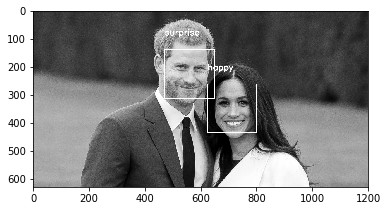

In [52]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(output_img)
imgplot = plt.imshow(img)
plt.show()